In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [46]:
star = np.zeros((500, 500))
w, h = int(star.shape[0]), int(star.shape[1]/2)

star_mask = create_circular_mask(star.shape[0], star.shape[1], radius=100)
star[star_mask] = 1.0
area_star_total = np.sum(star_mask)
area_star_fractional = []
    
for x in range(star.shape[0]):
    
    star = np.zeros((500, 500))
    star_mask = create_circular_mask(star.shape[0], star.shape[1], radius=100)
    planet_mask = create_circular_mask(star.shape[0], star.shape[1], center=(w-x, h-0), radius=50)

    star[star_mask] = 1.0
    star[planet_mask] = 0.0

    area_star_fractional.append(np.sum(star))
    
area_star = np.array(area_star_fractional)/area_star_total
    
# plt.imshow(star, origin='lower')

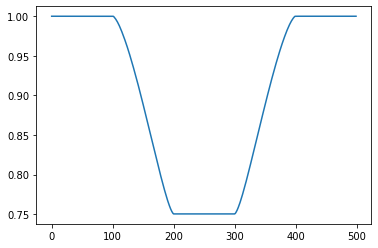

In [47]:
plt.plot(range(star.shape[0]), area_star)